## Decision Tree

A decision tree is a supervised machine learning paradigm for classifying or regressing data with discrete or continuous inputs. The decision  tree model islimited because it may only make decisions along the axes of the data, meaning it is not robust to rotation of the data. Below I have implemented the decision classification model.

The decision tree model steps along every axis and makes a binary split at the point where the greatest number of points are classified. This process is repeated over and over again until a maximum depth is reached. Because it must check every possible split in every dimension, the decision tree is slow compared to other methods. The splits can be considered to be branching from one another as illustrated below, hence the name decision tree. 

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [20]:
sal_by_college = pd.read_csv("salaries-by-college-type.csv")
sal_by_region = pd.read_csv("salaries-by-region.csv")
sal_by_degree = pd.read_csv("degrees-that-pay-back.csv")

In [21]:
#print(sal_by_region.head)
#print(sal_by_college.head)
sal_complete  = sal_by_college.merge(sal_by_region, on="School Name")
#print(sal_complete.head)
df = sal_complete[["School Name", "School Type", "Region", "Starting Median Salary_x"]]
names = df[["School Name"]].values
X = df[["School Type", "Region"]].apply(lambda x: pd.factorize(x)[0]).values
y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=99)

C:\Users\awhit\AppData\Local\Temp\ipykernel_40728\2133433700.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

RegTree1 = DecisionTreeRegressor(max_depth= 4, random_state=99)
RegTree1.fit(X_train, y_train)



RMSE Model 1:  438233.5791384792


The regression tree model instantiated above has max depth 4 and the decisions are illustated below. The regression tree works similarly to the decision tree classifier with the notable difference that instead of affixing a most correct label to a decision, it produces a minimal error value. In the discrete case we are dealing with this takes the form of a training sample mean at each predictor combination.

|--- Type <= 0.50
|   |--- Region <= 1.50
|   |   |--- Region <= 0.50
|   |   |   |--- value: [5973333.33]
|   |   |--- Region >  0.50
|   |   |   |--- value: [7550000.00]
|   |--- Region >  1.50
|   |   |--- Region <= 3.50
|   |   |   |--- Region <= 2.50
|   |   |   |   |--- value: [5266666.67]
|   |   |   |--- Region >  2.50
|   |   |   |   |--- value: [5100000.00]
|   |   |--- Region >  3.50
|   |   |   |--- value: [5590000.00]
|--- Type >  0.50
|   |--- Type <= 3.50
|   |   |--- Region <= 1.50
|   |   |   |--- Region <= 0.50
|   |   |   |   |--- value: [4552105.26]
|   |   |   |--- Region >  0.50
|   |   |   |   |--- value: [4772000.00]
|   |   |--- Region >  1.50
|   |   |   |--- Type <= 1.50
|   |   |   |   |--- value: [4766250.00]
|   |   |   |--- Type >  1.50
|   |   |   |   |--- value: [4349043.48]
|   |--- Type >  3.50
|   |   |--- value: [6067142.86]
 



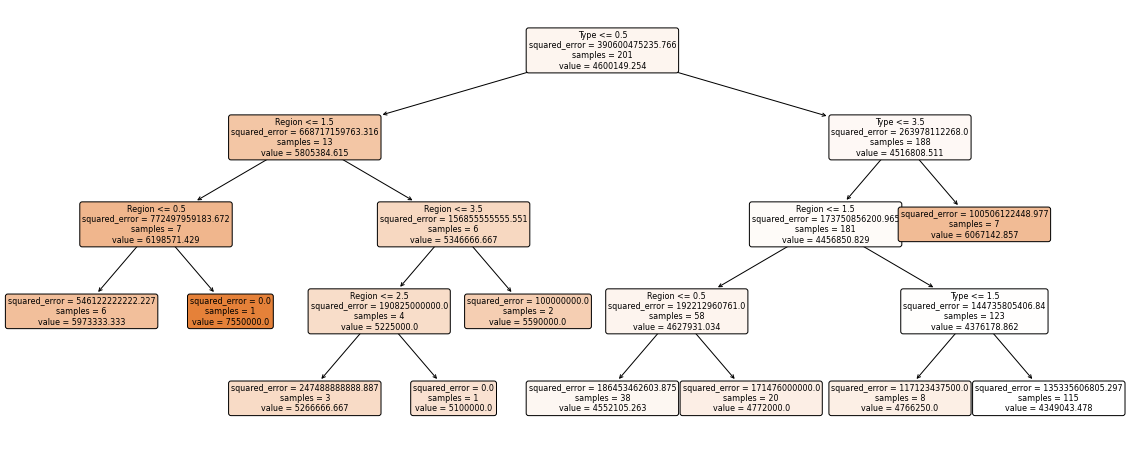

In [28]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

feature_names = ["Type", "Region"]
tree_rules = export_text(RegTree1,
                         feature_names = feature_names)
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(RegTree1,
                   feature_names = feature_names,
                   rounded = True,
                   filled = True, 
                   fontsize=8)
plt.show()

Above we have the decision plot for the trained regression tree. As a result of the limited number of distinct predictor combinations, we can observe that the model is exhibiting some overfitting with samples of low size. 

RMSE Model:  438233.5791384792


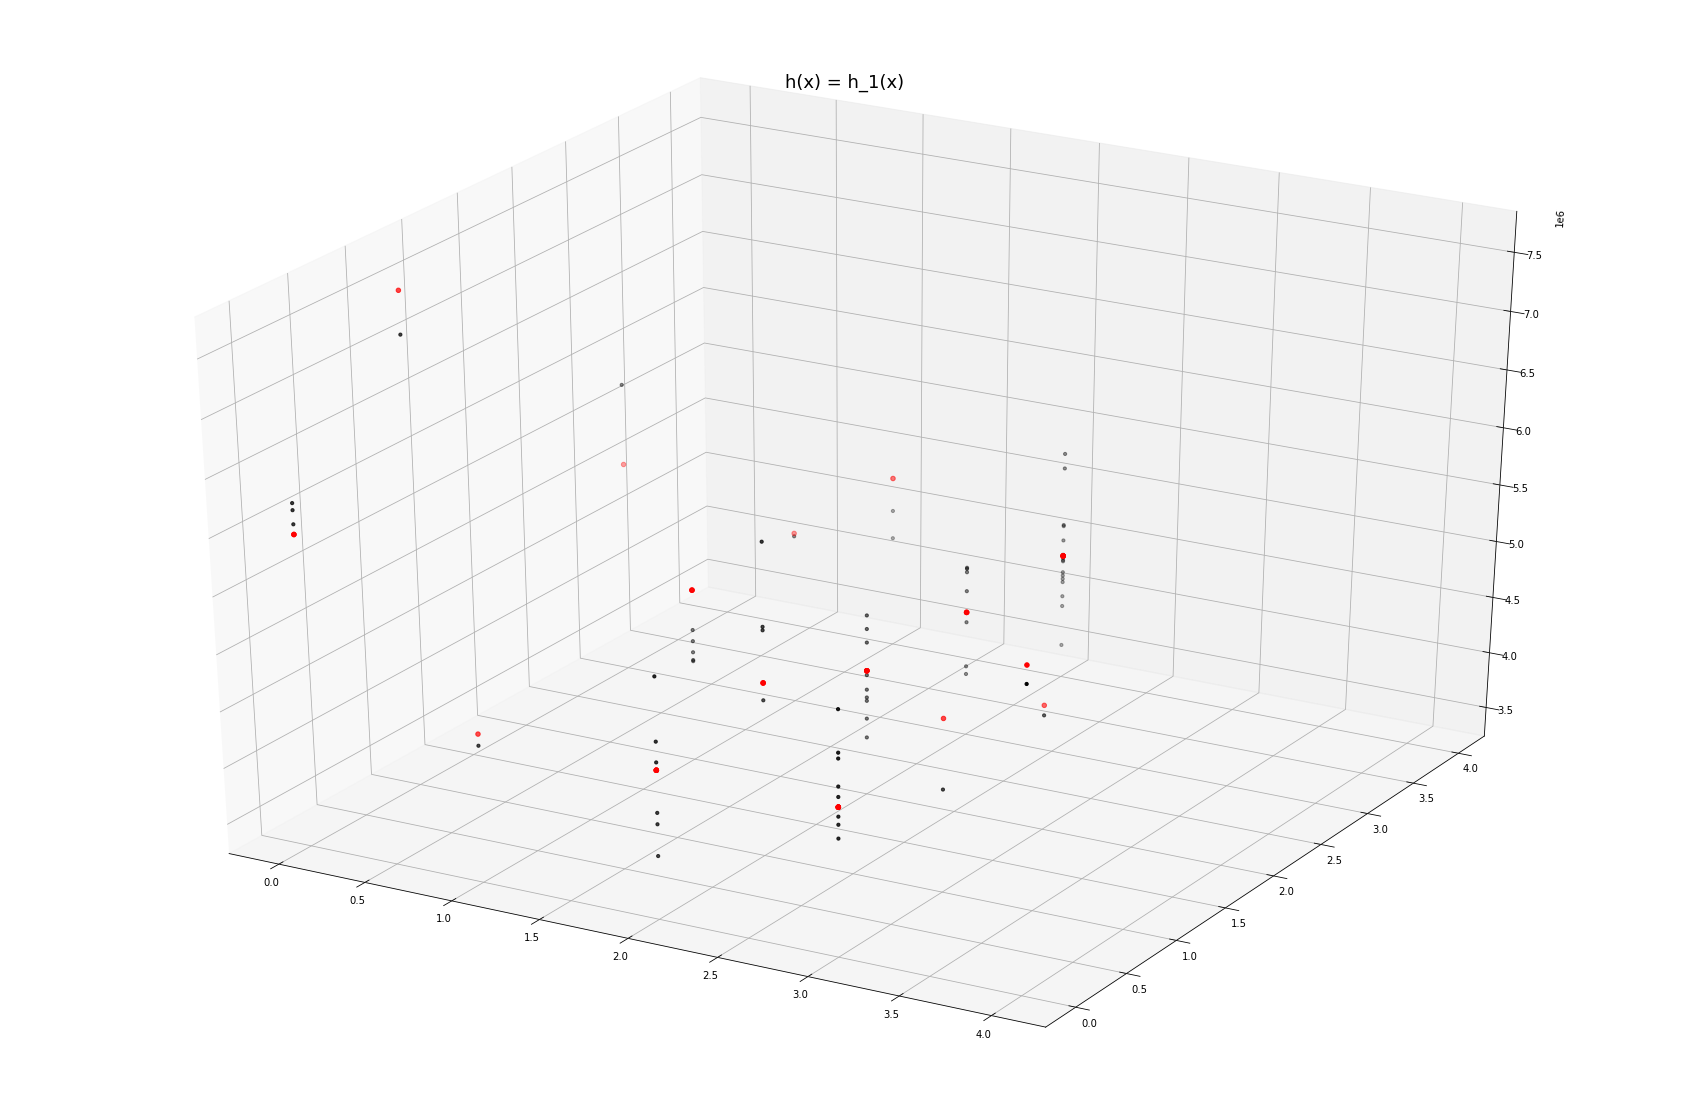

In [30]:
X_test0  = np.asarray([x[0] for x in X_test])
X_test1 = np.asarray([x[1] for x in X_test])
y_test = np.asarray(y_test)


print("RMSE Model: ", mean_squared_error(y_test, RegTree1.predict(X_test))**.5)

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

ax1.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax1.scatter3D(X_test0, X_test1,  RegTree1.predict(X_test), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)
plt.show()

The above plot of the decision regression tree predicitons on test data displays the limitations of the regression tree model on this dataset. While the model does reasonably well in the school typ/region combinations which are heterogeneous, it does not perform well in the combinations with outliers or small sample sizes. That is because for this case of discrete predictors, it is just estimating the mean of each combination within the training set and is thusly not very generalizable or robust on this dataset. It does perform somewhat accurately as we can see from the RMSE of $\sim 43,000$ and the location of the red predicition points relative to their true value counterparts. 